https://www.kaggle.com/code/rockystats/topic-modelling-using-nmf

In [1]:
import sys
import os
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [2]:
REPO_ROOT="C://Users//ericf//source//repos//text-inferences"


### shouldn't need to modify these
CORPORA = os.path.join(REPO_ROOT,'corpora','ifrc_evaluations')
INTERMEDIATES = os.path.join('.','file_intermediates')
sys.path.append(os.path.join(REPO_ROOT,'src','common_functions'))




In [227]:
from tqdm.auto import tqdm

import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', None)


import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_md")


from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from sklearn.decomposition import NMF


In [294]:
string = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed euismod."
segment_length = 10

split_strings = [string[i:i+segment_length] for i in range(0, len(string), segment_length)]
split_strings


['Lorem ipsu',
 'm dolor si',
 't amet, co',
 'nsectetur ',
 'adipiscing',
 ' elit. Sed',
 ' euismod.']

In [346]:
#paragraph level split

txt_list = [txt for txt in os.listdir(CORPORA) if txt[-4:] == '.txt']

df_paragraph = pd.DataFrame(columns=['file','original_text'])


for file in txt_list:

    print(file)

    with open (os.path.join(CORPORA,file), "r", encoding='utf-8') as f:
        content = f.read()
    #print(content)
    paras = re.split(r'\n\s*\n', content)

    paragraphs = []
    print(f"LEN OF PARAS IS {len(paras)}")
    for p in paras:

        #if the presumed paragraph is excessively long, split again into
        #sentences and group into 5 sentences per para
        if len(p) > 2500:
            sents = p.split('.')

            pseudo_para = ['. '.join(sents[i:i+5]) for i in range(0, len(sents), 5)]
            for pp in pseudo_para:

                #paragraphs.append([file,pp]) if len(pp) >= 14 else next
                
                if len(pp) >= 14:
                    #print([file,pp])
                    new_row = pd.DataFrame([[file,pp]], columns=df_paragraph.columns)
                    #print(f"xx {new_row}")
                    df_paragraph = pd.concat([df_paragraph, new_row], ignore_index=True)
        elif len(p) < 14:
            #noise...
            next
        else:
            #paragraphs.append([file,pp])
            #print([file,p])
            r = [file,p]
            new_row = pd.DataFrame([[file,p]], columns=['file','original_text'])
            #print(f"x {new_row}")
            df_paragraph = pd.concat([df_paragraph, new_row], ignore_index=True)
            #print(df_paragraph)



    #try:
    #    df_paragraph = pd.concat([df_paragraph, pd.Series(paragraphs)], ignore_index=True)
    #except Exception as e:
    #    print(e)
    #    pass



2003_evaluation_of_2002_floods_operations_in_china.txt
LEN OF PARAS IS 467
2003_evaluation_of_construction_of_toilets_for_rural_families_affected_by_flooding_in_gunaxi_zhuangg_autonomous_region_and_hunan_provine_people_s_republic_of_china.txt
LEN OF PARAS IS 183
2003_evaluation_of_hiv_aids_prevention_care_program_in_china.txt
LEN OF PARAS IS 414
2004_review_of_the_red_cross_water_and_sanitation_programme_in_the_democratic_people_s_republic_of_korea.txt
LEN OF PARAS IS 360
2005_asia_earthquakes_and_tsunamis_real_time_evaluation_round_1_synthesis_report.txt
LEN OF PARAS IS 189
2005_mid_term_review_strategy_2010.txt
LEN OF PARAS IS 1
2005_real_time_evaluation_of_tsunami_response_in_asia_and_east_africa_round_2.txt
LEN OF PARAS IS 491
2005_revision_de_mitad_de_periodo_estrategia_2010.txt
LEN OF PARAS IS 1
2006_final_evaluation_of_echo_funded_community_vulnerability_reduction_cvr_programme_echo_4.txt
LEN OF PARAS IS 119
2006_pakistan_flood_response_2007_review_of_the_shelter_working_group.t

2012_global_organizational_development_building_sustainable_local_capacity_in_the_branches_of_the_ghana_red_cross.txt
LEN OF PARAS IS 1
2012_idrl_colombia_a_study_on_legal_preparedness_for_international_disaster_assistance_in_colombia.txt
LEN OF PARAS IS 2
2012_independent_review_of_the_humanitarian_diplomacy_anchoring_theory_into_practice.txt
LEN OF PARAS IS 79
2012_kenya_emergency_health.txt
LEN OF PARAS IS 201
2012_management_response_final_evaluation_of_the_ifrc_dprk_rcs_2011_floods_operation.txt
LEN OF PARAS IS 22
2012_management_response_to_the_evaluation_on_preparing_for_and_responding_to_large_scale_disasters_in_high_income_countries_findings_and_lessons_learned_from_the_japanese_red_cross_society_s_response_to_the_great_east_japan_earthquake_and_tsunami.txt
LEN OF PARAS IS 2
2012_preparing_for_and_responding_to_large_scale_disasters_in_high_income_countries.txt
LEN OF PARAS IS 435
2012_preparing_for_and_responding_to_large_scale_disasters_in_high_income_countries_findings_and_

2014_international_disaster_response_law_rules_and_principles_in_jamaica_a_strength_and_gap_analysis_on_the_legislative_framework_for_receiving_international_disaster_relief.txt
LEN OF PARAS IS 1
2014_lecciones_aprendidas_en_taller_por_inundaciones_en_bolivia_2013.txt
LEN OF PARAS IS 40
2014_malawi_floods_dref_review_and_lessons_learnt_report.txt
LEN OF PARAS IS 118
2014_new_zealand_case_study_how_law_and_regulation_support_disaster_risk_reduction.txt
LEN OF PARAS IS 4
2014_nigeria_floods_early_recovery_shelter_beneficiary_satisfaction_survey.txt
LEN OF PARAS IS 150
2014_philippines_typhoon_haiyan_post_distribution_monitoring_report_preliminary_findings.txt
LEN OF PARAS IS 88
2014_programme_review_survey.txt
LEN OF PARAS IS 216
2014_research_on_the_role_of_social_capital_in_strengthening_disaster_resilience_in_thailand.txt
LEN OF PARAS IS 354
2014_review_report_on_volunteers_in_action_2009_2013.txt
LEN OF PARAS IS 1
2014_strategic_review_of_the_ex_regional_diaster_managment_unit_curren

2017_final_evaluation_of_school_based_disaster_risk_reduction_drr_project_in_gazipur_bangladesh.txt
LEN OF PARAS IS 219
2017_final_evaluation_of_the_belarus_population_movement_emergency_appeal_operation_mdrby006_.txt
LEN OF PARAS IS 38
2017_final_evaluation_of_the_ifrc_and_swedish_red_cross_supported_pmer_and_cea_capacity_building_project_2014_2016.txt
LEN OF PARAS IS 256
2017_final_evaluation_of_timor_leste_drought_operation_mdrtp004_.txt
LEN OF PARAS IS 70
2017_final_evaluation_report_madagascar_food_security_project.txt
LEN OF PARAS IS 191
2017_global_study_effective_law_and_policy_on_gender_equality_and_protection_from_sexual_and_gender_based_violence_in_disasters.txt
LEN OF PARAS IS 6
2017_kenya_red_cross_floods_response.txt
LEN OF PARAS IS 43
2017_nepal_country_case_study_effective_law_and_policy_on_gender_equality_and_protection_from_sexual_and_gender_based_violence_in_disasters.txt
LEN OF PARAS IS 1
2017_real_time_evaluation_of_the_drought_response.txt
LEN OF PARAS IS 64
2017_

2020_case_study_logistics_development_managing_in_kind_donations_with_the_private_sector_approaches_taken_by_the_spanish_red_cross_3_.txt
LEN OF PARAS IS 25
2020_cbhfa_programme_jordan.txt
LEN OF PARAS IS 26
2020_covid_19_diagnóstico_regional_americas.txt
LEN OF PARAS IS 1
2020_covid_19_outbreak_americas_regional_assessment_final_report.txt
LEN OF PARAS IS 1
2020_covid_19_pandemic_needs_assessment_for_response_and_recovery_in_asia_pacific.txt
LEN OF PARAS IS 2
2020_dref_argentina_sequia_mdrar017_lecciones_aprendidas.txt
LEN OF PARAS IS 43
2020_dref_paraguay_dengue_mdrpy021_lecciones_aprendidas.txt
LEN OF PARAS IS 35
2020_effectiveness_of_flood_early_warning_system_to_reduce_economic_loss_at_four_communities_integrated_flood_resilience_programme.txt
LEN OF PARAS IS 1
2020_evaluation_of_ifrc_s_disaster_law_programme.txt
LEN OF PARAS IS 259
2020_evaluation_of_the_arci_action_of_red_cross_on_integration_of_relocated_and_resettled_persons_project.txt
LEN OF PARAS IS 1
2020_evaluation_of_the

In [349]:
df_paragraph.to_csv("file_intermediates\evals_by_paragraph.csv")

In [401]:
df = pd.read_pickle(os.path.join(INTERMEDIATES,'eval_sents.pkl'))

#quick cleanup as original pkl file has some noise in it
df['year'] = df['file'].apply(lambda x: x[0:4])
df = df[df['year'] != 'rese']
df['year'] = df['year'].astype(int)
df_main = df[df['original_text'].str.len() > 80]

In [416]:
df.sample(3)

file  \
161717                                                  2016_global_review_on_volunteering.txt   
15581   2007_review_of_the_emergency_shelter_cluster_koshi_floods_emergency_response_nepal.txt   
8234                    2006_shaan_xi_development_project_learning_from_a_learning_process.txt   

                                                                                                                                                                                                                                                                                          original_text  \
161717  But, as our data show, more than 90 per cent of Red Cross and Red Crescent \nNational Societies interviewed in developing countries felt that investment in \nvolunteering development is far too low and that they are unable to secure the resources to meet the rising challenges they face.   
15581                                                                                                                                                                                                                                                                                      Double -Hat:   
8234                                                                                                                             Other observed results  \nEffects on other parts of the Shaanxi Red Cross  \nThe project  has inspired development also within other parts of the Shaanxi Red \nCross.   

                                                                                                                                                                                               preprocessed_text  \
161717  [datum, cent, red, cross, red, crescent, national, societies, interview, develop, country, feel, investment, volunteering, development, far, low, unable, secure, resource, meet, rise, challenge, face]   
15581                                                                                                                                                                                              [double, hat]   
8234                                                                                              [observe, result, effect, part, shaanxi, red, cross, project, inspire, development, part, shaanxi, red, cross]   

        year  
161717  2016  
15581   2007  
8234    2006

# Generate DFs at specific levels of Analysis

In [402]:
def generate_file_level_df(df):
    docs = []
    for document in df['file'].unique().tolist():
        doc_text = ' '.join(df['original_text'][df['file'] == document].tolist())
        docs.append([document, doc_text, document[0:4]])
    
    df_doc_level_content = pd.DataFrame(docs, columns=['file','original_text','year'])
    return df_doc_level_content
    return 'd'                
df_file_level = generate_file_level_df(df)


In [403]:
df_file_level

file  \
0                                                                                                                                        2003_evaluation_of_2002_floods_operations_in_china.txt   
1                       2003_evaluation_of_construction_of_toilets_for_rural_families_affected_by_flooding_in_gunaxi_zhuangg_autonomous_region_and_hunan_provine_people_s_republic_of_china.txt   
2                                                                                                                              2003_evaluation_of_hiv_aids_prevention_care_program_in_china.txt   
3                                                                                  2004_review_of_the_red_cross_water_and_sanitation_programme_in_the_democratic_people_s_republic_of_korea.txt   
4                                                                                                          2005_asia_earthquakes_and_tsunamis_real_time_evaluation_round_1_synthesis_report.txt   
..                                                                                                                                                                                          ...   
385                                                                                                                                   2022_lessons_learned_workshop_panama_floods_mrdpa014_.txt   
386                                                                                                                     2022_pdm_report_of_the_mdrnp011_nepal_monsoon_floods_and_landslides.txt   
387  2022_real_time_learning_rtl_covid_19_global_operation_how_are_the_ifrc_secretariat_and_national_societies_learning_from_the_covid_19_pandemic_to_prepare_and_address_multiple_hazards_.txt   
388                                                                                                                                                2022_red_ready_programme_mid_term_review.txt   
389                                                                                                                                                2022_review_of_the_rcrc_movement_sgbv_wg.txt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

## Define Functions to Analyze and Report on Topics

In [404]:
#This takes in docs at any arbitrary level of granularity


def analyze_topics(df):
    tfidf_vectorizer = TfidfVectorizer(stop_words=list(stopwords), min_df=5, max_df=0.7)
    tfidf_vectors = tfidf_vectorizer.fit_transform(df['original_text'])
    #tfidf_vectors = tfidf_vectorizer.fit_transform(df['preprocessed_text'])
    
    tfidf_vectors.shape

    nmf_text_model = NMF(n_components=30, random_state=42)

    W_text_matrix = nmf_text_model.fit_transform(tfidf_vectors)
    H_text_matrix = nmf_text_model.components_
    
    
    #googled...
    normalized_doc_topic_matrix = W_text_matrix / W_text_matrix.sum(axis=1, keepdims=True)
    
    
    def display_topics(model, features, no_top_words=8):
        topic_terms = []
        for topic, word_vector in enumerate(model.components_):
            total = word_vector.sum()
            largest = word_vector.argsort()[::-1]
            #print(f"\nTopic {topic}")
            
            keywords = []
            topic_characteristics = []

            for i in range(0, no_top_words):
                topic_characteristics.append(features[largest[i]])
                keywords.append(features[largest[i]])

                #print(" %s (%2.2f)" % (features[largest[i]],
                #                      word_vector[largest[i]]*100.0/total))
            topic_characteristics.append(', '.join(keywords))
            topic_terms.append(topic_characteristics)
        
        cols = np.arange(0,no_top_words)
        cols = np.append(cols, 'keywords')
        df_topic_info = pd.DataFrame(topic_terms, columns=[cols])
        
        return df_topic_info
    
    ## summarize the topic info in a dataframe and give it a title consisting of the top
    ## two words in the topic
    df_topic_info = display_topics(nmf_text_model, tfidf_vectorizer.get_feature_names_out())
    df_topic_info['title'] = df_topic_info.apply(lambda x: x[0] + ' ' + x[1], axis=1)
    #df_topic['keywords'] = df_topic_info
    
    
    return df_topic_info, normalized_doc_topic_matrix




## iterate through the topics and text and allocate them to each


def get_dominant_topic(normalized_doc_topic_matrix, df_topic_info, df_doc_info, dominance=0.25):
    idx = 0
    rows=[]
    
    for topic_values in normalized_doc_topic_matrix:
        maxid = pd.Series(topic_values).fillna(0).idxmax() #get the index of the max value
        #print(f"{maxid} ddddd {topic_values[maxid]}")
        if topic_values[maxid] > dominance:
            rows.append([idx,df_topic_info.iloc[maxid]['title'],df_topic_info.iloc[maxid]['keywords'],df_doc_info.iloc[idx]['file']])
            #print(f"{idx} : {df_topic_info.iloc[maxid]['title']} : {df_doc_info.iloc[idx]['file']}")
        else:
            rows.append([idx,'no dominant topic found','NA',df_doc_info.iloc[idx]['file']])
           # print(f"{idx} : topics too diffused to identify dominant topic {topic_values[maxid]}")
        idx +=1
    
    df_topic_summary = pd.DataFrame(rows,columns=['index_val','topic_title','topic_keywords','file_name'])
    return df_topic_summary



def get_dominant_sub_file_topic(normalized_doc_topic_matrix, df_topic_info, df_doc_info, dominance=0.25):
    idx = 0
    rows=[]
    
    for topic_values in normalized_doc_topic_matrix:
        maxid = pd.Series(topic_values).fillna(0).idxmax() #get the index of the max value
        #print(f"{maxid} ddddd {topic_values[maxid]}")
        if topic_values[maxid] > dominance:
            rows.append([idx,df_topic_info.iloc[maxid]['title'],df_topic_info.iloc[maxid]['keywords'],df_doc_info.iloc[idx]['original_text'],df_doc_info.iloc[idx]['file']])
            #print(f"{idx} : {df_topic_info.iloc[maxid]['title']} : {df_doc_info.iloc[idx]['file']}")
        else:
            rows.append([idx,'no dominant topic found','NA',df_doc_info.iloc[idx]['original_text'],df_doc_info.iloc[idx]['file']])
           # print(f"{idx} : topics too diffused to identify dominant topic {topic_values[maxid]}")
        idx +=1
    
    df_topic_summary = pd.DataFrame(rows,columns=['index_val','topic_title','topic_keywords','original_text','file_name'])
    return df_topic_summary




## Perform Analysis at the FILE level

In [405]:

df_topic_info, normalized_doc_topic_matrix = analyze_topics(df_file_level)

df_topic_summary = get_dominant_topic(normalized_doc_topic_matrix, df_topic_info, df_file_level)



C:\Users\ericf\anaconda3\envs\text-inferences\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


In [406]:
df_topic_summary[['topic_title','topic_keywords','file_name']].groupby(['topic_title','topic_keywords']).count().sort_values(by='file_name', ascending=False)[2:]

file_name
topic_title         topic_keywords                                                                           
shelter cluster     shelter, cluster, esc, haiti, agencies, sct, coordinator, clusters                     21
respondents survey  respondents, survey, households, figure, household, baseline, percent, latrine         19
dref operation      dref, operation, workshop, lrc, items, zrcs, learned, operations                       19
ns nss              ns, nss, ocac, nsd, secretariat, icrc, rc, pmer                                        19
zrcs cash           zrcs, cash, households, appeal, zimbabwe, gardens, household, drought                  18
cbdrr indonesia     cbdrr, indonesia, pmi, tsunami, resilience, lanka, sri, resilient                      17
law idrl            law, idrl, legal, volunteering, act, regulation, samoa, relief                         14
slrcs sri           slrcs, sri, lanka, houses, tsunami, housing, construction, house                       13
hiv aids            hiv, aids, peer, plhiv, condom, educators, alliance, blood                             13
prcs irp            prcs, irp, program, gaza, pakistan, sindh, punjab, bca                                 12
bdrcs bangladesh    bdrcs, bangladesh, pmo, flood, cyclone, 2019, operation, cox                           12
wash cvtl           wash, cvtl, pacific, program, timor, hygiene, leste, rdrt                              11
covid pandemic      covid, pandemic, cent, trcs, cva, 2020, coronavirus, americas                          11
migrants hrc        migrants, hrc, digital, migration, migrant, csos, identity, trafficking                11
de des              de, des, les, la, et, du, dans, pour                                                   10
belarus trafficking belarus, trafficking, brcs, minsk, rc, vots, guests, victims                           10
nrcs nepal          nrcs, nepal, district, recovery, districts, ero, relief, chapters                      10
trcs turkish        trcs, turkish, centre, turkey, courses, refugees, syrian, children                     10
srcs sudan          srcs, sudan, nile, puntland, branch, somalia, branches, khartoum                       10
rcsc china          rcsc, china, guangxi, toilets, mr, sichuan, yunnan, village                             9
cvm mozambique      cvm, mozambique, eru, appeal, operation, surge, rte, fact                               8
krcs county         krcs, county, cholera, counties, turkana, kenya, cash, drought                          8
sgbv violence       sgbv, violence, gender, women, equality, sexual, protection, law                        7
dprk rcs            dprk, rcs, cas, cbhfa, operation, watsan, ri, pyongyang                                 7
prc haiyan          prc, haiyan, typhoon, shelter, brc, recovery, barangay, philippines                     6
urcs pss            urcs, pss, ebola, outbreak, ukraine, livelihoods, stigma, sc                            6
jrcs fukushima      jrcs, fukushima, japan, nuclear, recovery, prefecture, scale, disasters                 5
mrcs myanmar        mrcs, myanmar, nargis, mongolia, operation, cyclone, township, feb                      5
frcs fiji           frcs, fiji, winston, tc, suva, ccst, cyclone, branch                                    3

In [407]:
df_topic_summary[df_topic_summary['topic_title'] == 'zrcs cash']

index_val topic_title  \
36          36   zrcs cash   
113        113   zrcs cash   
182        182   zrcs cash   
203        203   zrcs cash   
204        204   zrcs cash   
209        209   zrcs cash   
216        216   zrcs cash   
226        226   zrcs cash   
239        239   zrcs cash   
242        242   zrcs cash   
247        247   zrcs cash   
250        250   zrcs cash   
260        260   zrcs cash   
345        345   zrcs cash   
369        369   zrcs cash   
371        371   zrcs cash   
377        377   zrcs cash   
383        383   zrcs cash   

                                                            topic_keywords  \
36   zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   
113  zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   
182  zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   
203  zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   
204  zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   
209  zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   
216  zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   
226  zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   
239  zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   
242  zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   
247  zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   
250  zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   
260  zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   
345  zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   
369  zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   
371  zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   
377  zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   
383  zrcs, cash, households, appeal, zimbabwe, gardens, household, drought   

                                                                                                                                      file_name  
36                                          2009_evaluation_of_the_red_cross_response_to_typhoons_ketsana_and_mirinae_disasters_in_viet_nam.txt  
113  2013_external_end_of_project_evaluation_of_the_food_security_project_supported_by_the_japanese_government_and_implemented_by_ifrc_zrcs.txt  
182                                                                        2014_zimbabwe_food_insecurity_emergency_appeal_evaluation_report.txt  
203                                                                                           2015_zimbabwe_floods_dref_review_final_report.txt  
204                                                                                 2015_zimbabwe_food_security_emergency_appeal_evaluation.txt  
209                                                      2016_end_of_project_evaluation_chivi_water_sanitation_and_hygiene_project_chiwash_.txt  
216                                                   2016_final_evaluation_of_the_social_and_economic_reintegration_pilot_program_icrc_brc.txt  
226                                                                                                  2016_malawi_food_insecurity_evaluation.txt  
239                                                                                             2016_tigray_food_security_evaluation_report.txt  
242                                                                                             2016_viet_nam_safer_homes_safer_communities.txt  
247                                                                                         2017_ethiopia_drought_midterm_evaluation_report.txt  
250                         2017_evaluation_of_southern_africa_food_insecurity_appeal_implemented_in_zimbabwe_malawi_mozambique_and_namibia.txt  
260                                                  

## Perform Analysis at PARAGRAPH Level

In [418]:
df_paragraph.sample(2)

file  \
27596                           2013_haiti_lessons_learned_best_shelter_practices.txt   
43686  2015_chernobyl_humanitarian_assistance_and_rehabilitation_programme_charp_.txt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           original_text  
27596                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    ü A record number of Emergency Response Units were deployed to \nsupport the response in Haiti   
43686   \nAfter the Armenian earthquake (December 1988) the Soviet Union accepted \ninternational relief assistance for the first time since the 1920s.  This created a \nfavourable context for starting international cooperation for Chernobyl.   In June 1989 \nthe USSR accepted a team of World Health Organization (WHO) experts to as -\nsess the situation in the affected areas.  In October 1989 the USSR requested \nthe International Atomic Energy Agency (IAEA) to organize an international \nassessment of the consequences of the Chernobyl accident and the protective \nmeasures taken.  That created momentum for the International Red Cross and \nRed Crescent Movement to act: in December 1989 the Alliance approached the \nIFRC (called the “League” at the time) for an initial needs assessment in the most \naffected areas in Ukraine, Belarus and Russia

In [408]:
#df_paragraph

df_para_topic_info, normalized_para_topic_matrix = analyze_topics(df_paragraph)

df_para_topic_summary = get_dominant_sub_file_topic(normalized_para_topic_matrix, df_para_topic_info, df_paragraph)



C:\Users\ericf\anaconda3\envs\text-inferences\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(
C:\Users\ericf\AppData\Local\Temp\ipykernel_3892\767165825.py:18: RuntimeWarning: invalid value encountered in divide
  normalized_doc_topic_matrix = W_text_matrix / W_text_matrix.sum(axis=1, keepdims=True)


In [409]:


df_para_topic_summary.groupby(['topic_title','topic_keywords']).count().sort_values(by='index_val', ascending=False)

index_val  \
topic_title                 topic_keywords                                                                                                   
no dominant topic found     NA                                                                                                       10458   
beneficiaries cash          beneficiaries, cash, food, people, households, beneficiary, affected, assistance                          7733   
de la                       de, la, en, el, los, las, que, para                                                                       5409   
red cross                   red, cross, crescent, international, federation, societies, movement, society                             5180   
12 11                       12, 11, figure, 13, 14, 15, 18, 19                                                                        5156   
volunteers training         volunteers, training, staff, volunteer, branch, trained, activities, skills                               4703   
ifrc org                    ifrc, org, office, appeal, secretariat, country, www, team                                                3818   
community communities       community, communities, based, resilience, members, program, risk, local                                  3674   
support coordination        support, coordination, operation, capacity, ns, level, movement, needs                                    3594   
data collection             data, collection, analysis, survey, information, interviews, baseline, methods                            3494   
shelter cluster             shelter, cluster, coordination, haiti, emergency, 2010, federation, transitional                          3263   
national society            national, society, societies, capacity, development, building, regional, partner                          3244   
project implementation      project, implementation, activities, outcomes, design, projects, results, pilot                           3027   
evaluation final            evaluation, final, report, team, purpose, objectives, page, scope                                         2647   
disaster response           disaster, response, management, emergency, risk, international, preparedness, relief                      2537   
gender women                gender, women, violence, sgbv, protection, equality, men, sexual                                          2214   
water sanitation            water, sanitation, hygiene, drinking, supply, promotion, access, wash                                     2082   
programme lessons           programme, lessons, learned, 2010, haiti, practices, best, cbdrr                                          2080   
10 30                       10, 30, 20, 000, doi, 00, highly, limitations                                                             1902   
effectiveness relevance     effectiveness, relevance, efficiency, sustainability, objectives, impact, appropriateness, criteria       1677   
health care                 health, care, emergency, services, public, asia, pacific, education                                       1485   
table contents              table, contents, acronyms, abbreviations, list, age, center, acknowledgements                             1420   
annex reference             annex, reference, terms, list, documents, tor, questionnaire, interviewed                                 1382   
hiv global                  hiv, global, alliance, aids, ga, program, peer, ns                                                        1349   
findings key                findings, key, conclusions, interviews, informant, main, questions, chapter                               1202   
recommendations conclusions recommendations, conclusions, lessons, future, learned, main, conclusion, learnt                          1200   
review report               review, report, mid, final, team, term, purpose, dref                                                     1004   
les des    

In [414]:
df_para_topic_summary[df_para_topic_summary['topic_title']  == 'water sanitation'].sample(10)

index_val       topic_title  \
66915      66915  water sanitation   
37301      37301  water sanitation   
37347      37347  water sanitation   
37135      37135  water sanitation   
84771      84771  water sanitation   
37348      37348  water sanitation   
49293      49293  water sanitation   
41658      41658  water sanitation   
87804      87804  water sanitation   
84692      84692  water sanitation   

                                                              topic_keywords  \
66915  water, sanitation, hygiene, drinking, supply, promotion, access, wash   
37301  water, sanitation, hygiene, drinking, supply, promotion, access, wash   
37347  water, sanitation, hygiene, drinking, supply, promotion, access, wash   
37135  water, sanitation, hygiene, drinking, supply, promotion, access, wash   
84771  water, sanitation, hygiene, drinking, supply, promotion, access, wash   
37348  water, sanitation, hygiene, drinking, supply, promotion, access, wash   
49293  water, sanitation, hygiene, drinking, supply, promotion, access, wash   
41658  water, sanitation, hygiene, drinking, supply, promotion, access, wash   
87804  water, sanitation, hygiene, drinking, supply, promotion, access, wash   
84692  water, sanitation, hygiene, drinking, supply, promotion, access, wash   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        original_text  \
66915  Many communities, especially in \nIndonesia , noted that consistent \nhousehold water supply is required to \nimprove hygiene  and sanitation \nincluding the  use of pour flush latrines \nand allowing  more frequent showering \nand easier household cleaning. In Indonesia, sanitation was mostly \nupgraded from (dry) pit latrines to pour flush but like in Myanmar, some \ncommunities started with open \ndefection. Communities especially in \nMyanmar with a lower hygiene starting \npoint especially valued  the full \npackage of water, sanitation and hygiene , with one men’s  group saying \nthe hygiene training was their top rank.  \n The new/expanded/upgraded w ater supply systems save households, communities  and local \nauthorities money and time . Many  communities have multiple water sources and distribution systems \nseparated by use including of salty non-drinking water, in Myanmar. All households interviewed \nreported paying  (or expecting to pay)  for new (piped) water . They

## At Sentence Level

In [289]:
df_topic_summary[df_topic_summary['topic_title'] == 'hiv aids']

index_val topic_title  \
2            2    hiv aids   
11          11    hiv aids   
32          32    hiv aids   
40          40    hiv aids   
62          62    hiv aids   
70          70    hiv aids   
150        150    hiv aids   
153        153    hiv aids   
210        210    hiv aids   

                                                 topic_keywords  \
2    hiv, aids, peer, plhiv, condom, educators, alliance, blood   
11   hiv, aids, peer, plhiv, condom, educators, alliance, blood   
32   hiv, aids, peer, plhiv, condom, educators, alliance, blood   
40   hiv, aids, peer, plhiv, condom, educators, alliance, blood   
62   hiv, aids, peer, plhiv, condom, educators, alliance, blood   
70   hiv, aids, peer, plhiv, condom, educators, alliance, blood   
150  hiv, aids, peer, plhiv, condom, educators, alliance, blood   
153  hiv, aids, peer, plhiv, condom, educators, alliance, blood   
210  hiv, aids, peer, plhiv, condom, educators, alliance, blood   

                                                                                                      file_name  
2                                              2003_evaluation_of_hiv_aids_prevention_care_program_in_china.txt  
11                                             2006_xinjiang_red_cross_hiv_aids_prevention_and_care_program.txt  
32                                                   2009_end_term_evaluation_of_red_cross_and_red_crescent.txt  
40                                       2009_review_of_the_fiji_red_cross_hiv_aids_and_blood_iec_materials.txt  
62                       2011_final_evaluation_of_the_mongolian_red_cross_society_hiv_aids_response_program.txt  
70   2011_mid_term_evaluation_reducing_vulnerability_to_hiv_and_its_impact_in_four_pacific_island_countries.txt  
150                                2013_twc_central_america_ga_countries_and_perhaps_chile_and_or_colombia_.txt  
153                                                   2013_zone_led_ga_on_hiv_mid_term_review_2008_to_2010_.txt  
210                                               2016_evaluation_of_global_hiv_an_aids_programme_2006_2010.txt

## 180 : hiv aids : 2014_yabc_impact_study_report.txt
What is YABC???


In [400]:
#lets get this file:

df_specific_doc_sent_level = df[df['file'] == '2015_chernobyl_humanitarian_assistance_and_rehabilitation_programme_charp_.txt']

df_specific_doc_sent_level = df_specific_doc_sent_level.reset_index()

df_sent_topic_info, normalized_sent_topic_matrix = analyze_topics(df_specific_doc_sent_level)
df_sent_topic_summary = get_dominant_topic(normalized_sent_topic_matrix, df_sent_topic_info, df_specific_doc_sent_level)
df_sent_topic_summary.groupby(['topic_title','topic_keywords']).count().sort_values(by='index_val', ascending=False)


C:\Users\ericf\anaconda3\envs\text-inferences\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(
C:\Users\ericf\AppData\Local\Temp\ipykernel_3892\767165825.py:18: RuntimeWarning: invalid value encountered in divide
  normalized_doc_topic_matrix = W_text_matrix / W_text_matrix.sum(axis=1, keepdims=True)


index_val  \
topic_title                 topic_keywords                                                                                               
no dominant topic found     NA                                                                                                     111   
red cross                   red, cross, crescent, federation, international, societies, review, movement                            94   
humanitarian rehabilitation humanitarian, rehabilitation, assistance, chernobyl, programme, 1990, charp, evaluation                 71   
chernobyl accident          chernobyl, accident, consequences, disaster, power, nuclear, plant, april                               69   
monitoring food             monitoring, food, contamination, radiation, levels, environment, environmental, 1993                    68   
thyroid gland               thyroid, gland, screening, pathologies, cancer, cases, patients, detecting                              62   
nuclear preparedness        nuclear, preparedness, radiological, disasters, accidents, technological, response, emergencies         60   
health public               health, public, authorities, system, systems, services, countries, related                              59   
un scientific               un, scientific, community, agencies, international, technical, analysis, action                         53   
needs addressing            needs, addressing, 1990, 2001, 2012, assessment, emerging, 2000                                         49   
review team                 review, team, report, study, management, deliverables, committee, objectives                            48   
00 mr                       00, mr, belarus, rovno, ukraine, ms, chairman, meeting                                                  47   
ifrc secretariat            ifrc, secretariat, org, 2013, geneva, october, kiev, europe                                             47   
support psychosocial        support, psychosocial, psychological, terms, mainstreaming, long, 1991, providing                       46   
staff volunteers            staff, volunteers, mdl, cross, teams, red, local, trained                                               46   
pss activities              pss, activities, project, 1997, pilot, training, component, skills                                      44   
people information          people, information, thousands, live, hundreds, lives, contaminated, life                               42   
charp funding               charp, funding, started, echo, implementation, stopped, manager, document                               42   
emergency response          emergency, response, knowledge, new, experience, expertise, recovery, successfully                      39   
programme objectives        programme, objectives, implementation, activities, different, formulated, key, stages                   35   
000 francs                  000, francs, swiss, total, 1990, year, 500, appeal                                                      34   
data secondary              data, secondary, analysis, relevant, financial, number, reports, collection                             33   
national societies          national, societies, society, capacity, governments, russia, ukraine, donors                            33   
strategy exit               strategy, exit, viable, 2003, reasons, emotional, 2010, delivery                                        32   
soviet union                soviet, union, 1991, collapse, following, december, important, time                                     32   
milk distribution           milk, distribution, powder, children, multivitamins, distributed, vitamins, materials                   30   
annex evaluation            annex, evaluation, list, documents, 2015, 1996, final, reviewed                                         28   
world events                world, events, actors, movementcharp, red, international, crescent, 1986                       

In [275]:
indices = df_topic_summary['index_val'][df_topic_summary['topic_title'] == 'yabc programme'].tolist()

In [276]:
df_specific_doc_sent_level.iloc[indices]

index                               file  \
40    129831  2014_yabc_impact_study_report.txt   
49    129840  2014_yabc_impact_study_report.txt   
50    129841  2014_yabc_impact_study_report.txt   
142   129933  2014_yabc_impact_study_report.txt   
197   129988  2014_yabc_impact_study_report.txt   
...      ...                                ...   
2897  132688  2014_yabc_impact_study_report.txt   
2899  132690  2014_yabc_impact_study_report.txt   
2903  132694  2014_yabc_impact_study_report.txt   
2905  132696  2014_yabc_impact_study_report.txt   
2907  132698  2014_yabc_impact_study_report.txt   

                                                                                                                                                                                                                                                                                                                                                                                             original_text  \
40                                                                                                                                                                                                                                                                                                                                                                                             Sample YABC   
49    271 \n \n    \nABOUT THE ‘YOUTH AS AG ENTS OF  \nBEHAVIOURAL CHANGE’ (YABC) INITIATIVE  \n \n \nFor general information on YABC you may consult:  \n YABC statutory basis  \n YABC conceptual framework: original version 2008 , (see page5 ) / \ncontemporary version (Seven Skills for Seven Principles, 747)   \n YABC vision  (video)  / (script)  \n YABC introduction  \n YABC video  \n   
50                                                                                                                                                                                                                                                                                                                                                        YABC brochure   \n YABC toolkit video  \n \n      
142                                                                                                                                                                                                                                                                                                      I have seen big changes in very \nconservative norms and traditions thanks to these YABC courses.   
197                                                                                                                                                                                                             It is reasonable to expect that  prior   18 | P a g e  \n familiarity of the participants with the YABC programme itself would be lower, given the specific \nnature of the programme.  \n   
...                                                                                                                                                                                                                                                                                                                                                                                                    ...   
2897                                                                                                                                                                                                                                                                                In your opinion, what are the major strengths (added -value) of the  YABC programme when \nimplemented in your school?   
2899                                                                                                                                                                                                              

# END

In [241]:
df_topic_info

0              1              2             3               4  \
0          peer      educators       trainers      educator            yabc   
1       trainer           male           east        middle          africa   
2            de             et            les           que              la   
3        change      behaviour        process      attitude      mechanisms   
4           red          cross       crescent   integration      initiative   
5       scholar         google             uk            co              hl   
6      national        society      programme     societies         support   
7    principles    fundamental         values  humanitarian   understanding   
8      training       transfer          event   development  organizational   
9          data       findings    qualitative    robustness          robust   
10           10            doi           1111          1080            1002   
11       people          young           talk          like             000   
12       europe        western         female      educator             age   
13        study         jordan     university      brighton         trainer   
14       social   mobilisation       identity         group       behaviour   
15   psychology        journal        applied   development              74   
16         rcrc     programmes        impacts    volunteers             iii   
17         http      retrieved            org       psycnet             apa   
18       impact     mechanisms    pedagogical            ii      individual   
19   operations         relief    coordinator         civil          unrest   
20     appendix      quotation     quotations      evidence              12   
21        think            way            don     different            like   
22         ifrc     delegation           head         value            asia   
23         yabc      programme        toolkit    activities       framework   
24          non      cognitive  communication       violent  discrimination   
25     learning      affective        process     immediacy        transfer   
26        youth     department     volunteers     trainings       volunteer   
27          new  beneficiaries        reached           000            york   
28  behavioural         skills        changes          life      motivation   
29       survey         global       response          rate     respondents   

                 5           6               7                   title  
0        observers  interviews        external          peer educators  
1             asia       south             age            trainer male  
2              des          le             est                   de et  
3          mindset    positive  organisational        change behaviour  
4          society     program      activities               red cross  
5           as_sdt          en            http          scholar google  
6          general   secretary       strategic        national society  
7       vocabulary    personal      understand  principles fundamental  
8          quality        self   international       training transfer  
9           sample     sources          source           data findings  
10            1177        2004            1997                  10 doi  
11          listen     reached       tolerance            people young  
12            peer     eastern              20          europe western  
13          values    academic        trainers            study jordan  
14            self  investment        personal     social mobilisation  
15     personality  management       personnel      psychology journal  
16  organisational   volunteer        economic         rcrc programmes  
17        psycinfo    journals             apl          http retrieved  
18           human     factors        positive       impact mechanisms  
19              th         soc      volunteers       operations relief  
20            self          21 

In [151]:
df_topic_info['title'] = df_topic_info.apply(lambda x: x[0] + ' ' + x[1], axis=1)
df_topics_info['keywords'] = 
df_topic_info

0            1           2             3            4  \
0            de           la         los           las          que   
1         slrcs          sri       lanka        houses      tsunami   
2       shelter      cluster         esc         haiti     agencies   
3            ns          nss        ocac           nsd  secretariat   
4          dref    operation    workshop           lrc        items   
5            de          des         les            la           et   
6          trcs      turkish      centre        turkey      courses   
7          nrcs        nepal    district      recovery    districts   
8         bdrcs   bangladesh         pmo         flood      cyclone   
9           hiv         aids        peer         plhiv       condom   
10         prcs          irp     program          gaza     pakistan   
11         krcs       county     cholera      counties      turkana   
12         sgbv     violence      gender         women     equality   
13      belarus  trafficking        brcs         minsk           rc   
14         dprk          rcs         cas         cbhfa    operation   
15  respondents       survey  households        figure    household   
16         jrcs    fukushima       japan       nuclear     recovery   
17          prc       haiyan     typhoon       shelter          brc   
18         urcs          pss       ebola      outbreak      ukraine   
19          law         idrl       legal  volunteering          act   
20         rcsc        china     guangxi       toilets           mr   
21         wash         cvtl     pacific       program        timor   
22         mrcs      myanmar      nargis      mongolia    operation   
23        covid     pandemic        cent          trcs          cva   
24         zrcs         cash  households        appeal     zimbabwe   
25     migrants          hrc     digital     migration      migrant   
26          cvm   mozambique         eru        appeal    operation   
27         frcs         fiji     winston            tc         suva   
28         srcs        sudan        nile      puntland       branch   
29        cbdrr    indonesia         pmi       tsunami   resilience   

              5             6            7                title  
0            en            el         para                de la  
1       housing  construction        house            slrcs sri  
2           sct   coordinator     clusters      shelter cluster  
3          icrc            rc         pmer               ns nss  
4          zrcs       learned   operations       dref operation  
5            du          dans         pour               de des  
6      refugees        syrian     children         trcs turkish  
7           ero        relief     chapters           nrcs nepal  
8          2019     operation          cox     bdrcs bangladesh  
9     educators      alliance        blood             hiv aids  
10        sindh        punjab          bca             prcs irp  
11        kenya          cash      drought          krcs county  
12       sexual    protection          law        sgbv violence  
13         vots        guests      victims  belarus trafficking  
14       watsan            ri    pyongyang             dprk rcs  
15     baseline       percent      latrine   respondents survey  
16   prefecture         scale    disasters       jrcs fukushima  
17     recovery      barangay  philippines           prc haiyan  
18  livelihoods        stigma           sc             urcs pss  
19   regulation         samoa       relief             law idrl  
20      sichuan        yunnan      village           rcsc china  
21      hygiene         leste         rdrt            wash cvtl  
22      cyclone      township          feb         mrcs myanmar  
23         2020   coronavirus     americas       covid pandemic  
24      gardens     household      drought            zrcs cash  
25         csos      identity  trafficking         migrants hrc  
26        surge           rte 

In [59]:
#reduce df_main to a single file
df_main = df_main[df_main['file'] == '2017_global_study_effective_law_and_policy_on_gender_equality_and_protection_from_sexual_and_gender_based_violence_in_disasters.txt']
df_main

file  \
187805  2017_global_study_effective_law_and_policy_on_...   
187806  2017_global_study_effective_law_and_policy_on_...   
187807  2017_global_study_effective_law_and_policy_on_...   
187808  2017_global_study_effective_law_and_policy_on_...   
187809  2017_global_study_effective_law_and_policy_on_...   
...                                                   ...   
189171  2017_global_study_effective_law_and_policy_on_...   
189173  2017_global_study_effective_law_and_policy_on_...   
189174  2017_global_study_effective_law_and_policy_on_...   
189176  2017_global_study_effective_law_and_policy_on_...   
189177  2017_global_study_effective_law_and_policy_on_...   

                                            original_text  \
187805   Effective law and policy \non gender equality...   
187806  Together with our 189 member National \nRed Cr...   
187807  We act before, during and after disasters and ...   
187808  We do so with \nimpartiality as to nationality...   
187809  Guided by Strategy 2020 – our collective plan ...   
...                                                   ...   
189171  The \nNational Societies, while auxiliaries in...   
189173  It is a voluntary relief movement \nnot prompt...   
189174  Unity / There can be only one Red Cross or Red...   
189176  Universality / The International Red Cross and...   
189177  The Fundamental Principles of the Internationa...   

                                        preprocessed_text  year  
187805  [effective, law, policy, gender, equality, pro...  2017  
187806  [member, national, red, cross, red, crescent, ...  2017  
187807  [act, disaster, health, emergency, meet, need,...  2017  
187808  [impartiality, nationality, race, gender, reli...  2017  
187809  [guide, strategy, collective, plan, action, ta...  2017  
...                                                   ...   ...  
189171  [national, societies, auxiliary, humanitar, ia...  2017  
189173  [voluntary, relief, movement, prompt, manner, ...  2017  
189174  [unity, red, cross, red, cres, cent, society, ...  2017  
189176  [universality, international, red, cross, red,...  2017  
189177  [fundamental, principles, international, red, ...  2017  

[948 rows x 4 columns]

In [60]:
#refer to NMF Blueprint page 213-214

tfidf_para_vectorizer = TfidfVectorizer(stop_words=list(stopwords), min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(df_main['original_text'])
tfidf_para_vectors.shape

nmf_text_model = NMF(n_components=20, random_state=42)

W_text_matrix = nmf_text_model.fit_transform(tfidf_para_vectors)
H_text_matrix = nmf_text_model.components_

C:\Users\ericf\anaconda3\envs\text-inferences\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


In [61]:
def display_topics(model, features, no_top_words=8):
    for topic, word_vector in enumerate(model.components_):
        total = word_vector.sum()
        largest = word_vector.argsort()[::-1]
        print(f"\nTopic {topic}")
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],
                                  word_vector[largest[i]]*100.0/total))
            
display_topics(nmf_text_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 0
 gender (11.34)
 policy (7.30)
 effective (7.18)
 equality (7.06)
 based (7.04)
 law (6.98)
 protection (6.22)
 sexual (6.15)

Topic 1
 red (20.18)
 cross (10.59)
 crescent (9.42)
 international (7.15)
 federation (5.98)
 movement (3.43)
 ifrc (2.24)
 societies (2.06)

Topic 2
 drm (9.67)
 laws (6.11)
 policies (4.13)
 gender (3.85)
 equality (3.05)
 systems (2.99)
 include (2.50)
 provisions (2.00)

Topic 3
 www (10.25)
 org (8.70)
 http (8.43)
 pdf (5.89)
 files (3.10)
 en (2.92)
 ifrc (2.69)
 pagefiles (2.23)

Topic 4
 risk (12.57)
 disaster (10.69)
 reduction (9.57)
 management (3.44)
 sensitive (2.84)
 gender (1.97)
 climate (1.47)
 making (1.41)

Topic 5
 sgbv (9.57)
 protection (2.91)
 frameworks (2.59)
 disaster (2.11)
 support (1.88)
 police (1.78)
 survivors (1.72)
 disasters (1.70)

Topic 6
 violence (10.98)
 sexual (4.90)
 domestic (3.94)
 partner (2.75)
 family (2.42)
 intimate (2.00)
 based (1.95)
 rape (1.86)

Topic 7
 case (8.26)
 country (7.06)
 study (6.93)
 

In [104]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.00

array([4.5383287 , 8.47643835, 5.05672946, 4.42559449, 5.93817783,
       7.78136012, 3.76842042, 5.18339886, 4.0033611 , 2.70251019,
       4.30054472, 3.97033528, 5.28065182, 6.02801725, 2.91492171,
       5.28218507, 3.95081116, 4.02821096, 3.74566774, 8.62433478])

In [106]:
voc

array(['10', '11', '16', '1995', '20', '2002', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2030', '24', '30', '31', '32', '32nd', '35', '38',
       '40', '_assets', 'able', 'absence', 'abuse', 'access', 'account',
       'accountability', 'achieve', 'act', 'action', 'active',
       'activities', 'actors', 'acts', 'ad', 'add', 'additional',
       'address', 'addressed', 'addressing', 'adopted', 'advocacy',
       'affairs', 'affected', 'age', 'agencies', 'agency', 'agenda',
       'agreed', 'agreements', 'aid', 'aimed', 'analysis', 'annex',
       'application', 'apply', 'approach', 'area', 'areas', 'armed',
       'article', 'articles', 'asia', 'aspects', 'aspx', 'assault',
       'assembly', 'assessments', 'assistance', 'available', 'awareness',
       'based', 'basic', 'basis', 'beijing', 'best', 'better', 'bill',
       'bit', 'bodies', 'boys', 'bring', 'broader', 'building', 'camps',
       'canadian', 'c

In [105]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_text_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

topic_names

['Topic gender policy',
 'Topic red cross',
 'Topic drm laws',
 'Topic www org',
 'Topic risk disaster',
 'Topic sgbv protection',
 'Topic violence sexual',
 'Topic case country',
 'Topic gbvims information',
 'Topic un fund',
 'Topic humanitarian standards',
 'Topic rights human',
 'Topic shelter gbv',
 'Topic national society',
 'Topic development sustainable',
 'Topic disasters natural',
 'Topic response resolution',
 'Topic assistance relief',
 'Topic framework sendai',
 'Topic women girls']

In [152]:
np.array(df_main['year'] < 2010)

array([ True,  True,  True, ..., False, False, False])

In [155]:
before_2010 = np.array(df_main['year'] < 2010)
after_2010 = ~ before_2010


before_2010 = nmf_text_model.transform(tfidf_para_vectors[before_2010])
print(before_2010.sum(axis=0)/before_2010.sum()*100.00)



after_2010 = nmf_text_model.transform(tfidf_para_vectors[after_2010])
print(after_2010.sum(axis=0)/after_2010.sum()*100.00)

[5.66819166 3.11702152 7.64415369 3.67168896 3.81090412 6.65442082
 4.60724637 5.99750714 3.79492565 3.56043127 3.86962776 5.51023033
 3.04475487 5.01072743 5.03142623 4.43646415 9.91496077 4.13961118
 6.83978237 3.67592372]
[5.79452862 7.34063385 6.23826193 4.70048727 3.56350861 3.17952991
 5.29469908 4.06254294 4.85249685 3.23803369 4.77085193 4.91915049
 3.80010311 6.37806071 4.24764221 4.06515449 7.63948266 4.82737631
 6.74658351 4.34087181]


In [158]:
year_data = []
years = np.unique(df_main['year'])
for year in tqdm(years):
    W_year = nmf_text_model.transform(tfidf_para_vectors[np.array(df_main['year'] == year)])
    year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 21.22it/s]


<Axes: xlabel='year'>

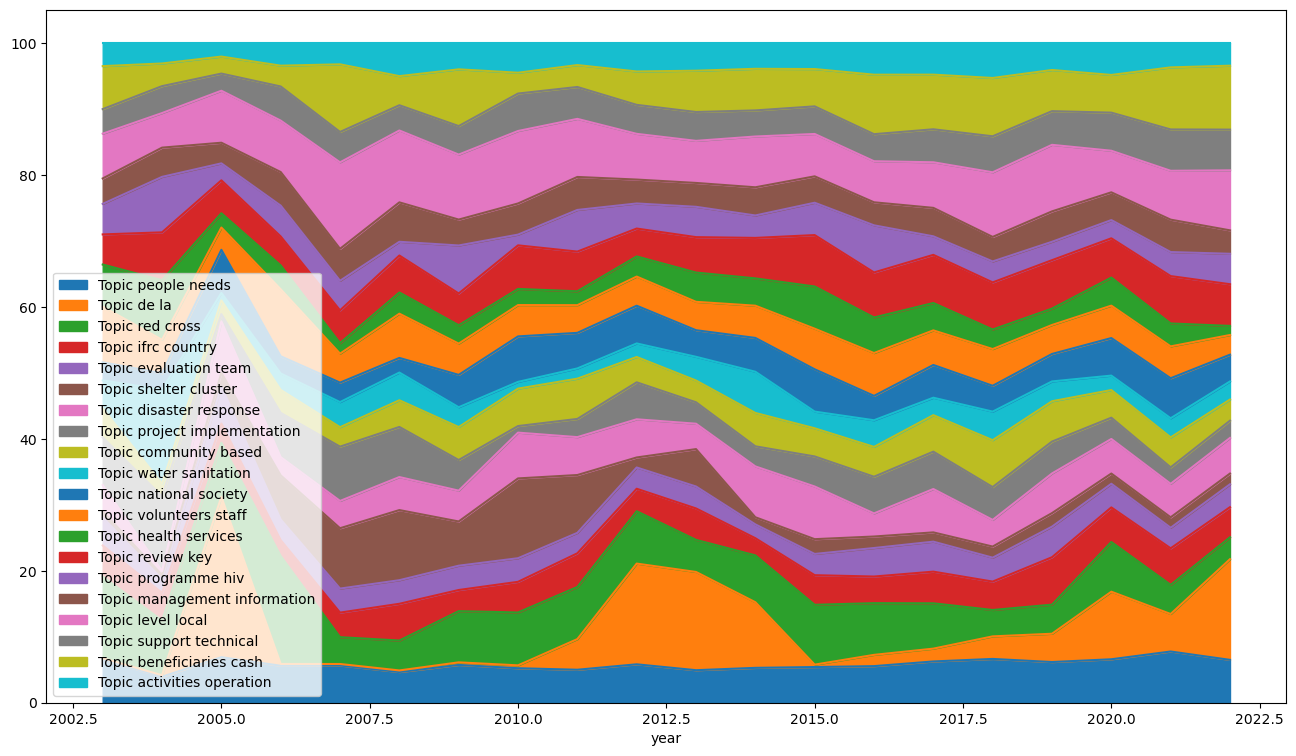

In [161]:
df_year = pd.DataFrame(year_data, columns = ["year"] + topic_names).set_index("year")
df_year.plot.area(figsize=(16,9))

In [165]:
file_data = []
files = np.unique(df_main['file'])
for file in tqdm(files):
    W_file = nmf_text_model.transform(tfidf_para_vectors[np.array(df_main['file'] == file)])
    file_data.append([file] + list(W_file.sum(axis=0)/W_file.sum()*100.0))    
    


  0%|          | 0/390 [00:00<?, ?it/s]

In [167]:
df_file

Topic people needs  \
file                                                                     
2003_evaluation_of_2002_floods_operations_in_ch...            6.831897   
2003_evaluation_of_construction_of_toilets_for_...            7.114157   
2003_evaluation_of_hiv_aids_prevention_care_pro...            5.869999   
2004_review_of_the_red_cross_water_and_sanitati...            3.941289   
2005_asia_earthquakes_and_tsunamis_real_time_ev...            8.551829   
...                                                                ...   
2022_lessons_learned_workshop_panama_floods_mrd...            0.129115   
2022_pdm_report_of_the_mdrnp011_nepal_monsoon_f...           12.572287   
2022_real_time_learning_rtl_covid_19_global_ope...            5.044495   
2022_red_ready_programme_mid_term_review.txt                  3.354944   
2022_review_of_the_rcrc_movement_sgbv_wg.txt                  5.121827   

                                                    Topic de la  \
file                                                              
2003_evaluation_of_2002_floods_operations_in_ch...     0.198550   
2003_evaluation_of_construction_of_toilets_for_...     0.252911   
2003_evaluation_of_hiv_aids_prevention_care_pro...     0.178263   
2004_review_of_the_red_cross_water_and_sanitati...     0.220391   
2005_asia_earthquakes_and_tsunamis_real_time_ev...     0.657077   
...                                                         ...   
2022_lessons_learned_workshop_panama_floods_mrd...    96.649943   
2022_pdm_report_of_the_mdrnp011_nepal_monsoon_f...     0.205355   
2022_real_time_learning_rtl_covid_19_global_ope...     0.116187   
2022_red_ready_programme_mid_term_review.txt           0.114107   
2022_review_of_the_rcrc_movement_sgbv_wg.txt           0.133428   

                                                    Topic red cross  \
file                                                                  
2003_evaluation_of_2002_floods_operations_in_ch...        12.248845   
2003_evaluation_of_construction_of_toilets_for_...        11.784907   
2003_evaluation_of_hiv_aids_prevention_care_pro...        12.881812   
2004_review_of_the_red_cross_water_and_sanitati...         8.282937   
2005_asia_earthquakes_and_tsunamis_real_time_ev...         7.079349   
...                                                             ...   
2022_lessons_learned_workshop_panama_floods_mrd...         0.576358   
2022_pdm_report_of_the_mdrnp011_nepal_monsoon_f...         0.979578   
2022_real_time_learning_rtl_covid_19_global_ope...         2.534683   
2022_red_ready_programme_mid_term_review.txt               7.292477   
2022_review_of_the_rcrc_movement_sgbv_wg.txt               3.694963   

                                                    Topic ifrc country  \
file                                                                     
2003_evaluation_of_2002_floods_operations_in_ch...            9.377180   
2003_evaluation_of_construction_of_toilets_for_...            3.823281   
2003_evaluation_of_hiv_aids_prevention_care_pro...            0.444469   
2004_review_of_the_red_cross_water_and_sanitati...            4.194524   
2005_asia_earthquakes_and_tsunamis_real_time_ev...            3.592014   
...                                                                ...   
2022_lessons_learned_workshop_panama_floods_mrd...            0.069753   
2022_pdm_report_of_the_mdrnp011_nepal_monsoon_f...            0.933735   
2022_real_time_learning_rtl_covid_19_global_ope...            7.763048   
2022_red_ready_programme_mid_term_review.txt                  5.282930   
2022_review_of_the_rcrc_movement_sgbv_wg.txt                 11.286816   

                                                    Topic evaluation team  \
file                                                                        
2003_evaluation_of_2002_floods_operations_in_ch...               4.544620   
2003_evaluation_of_construction_of_toilets_for_...               3.153249   
2003_evaluation_of_hiv

<Axes: xlabel='file'>

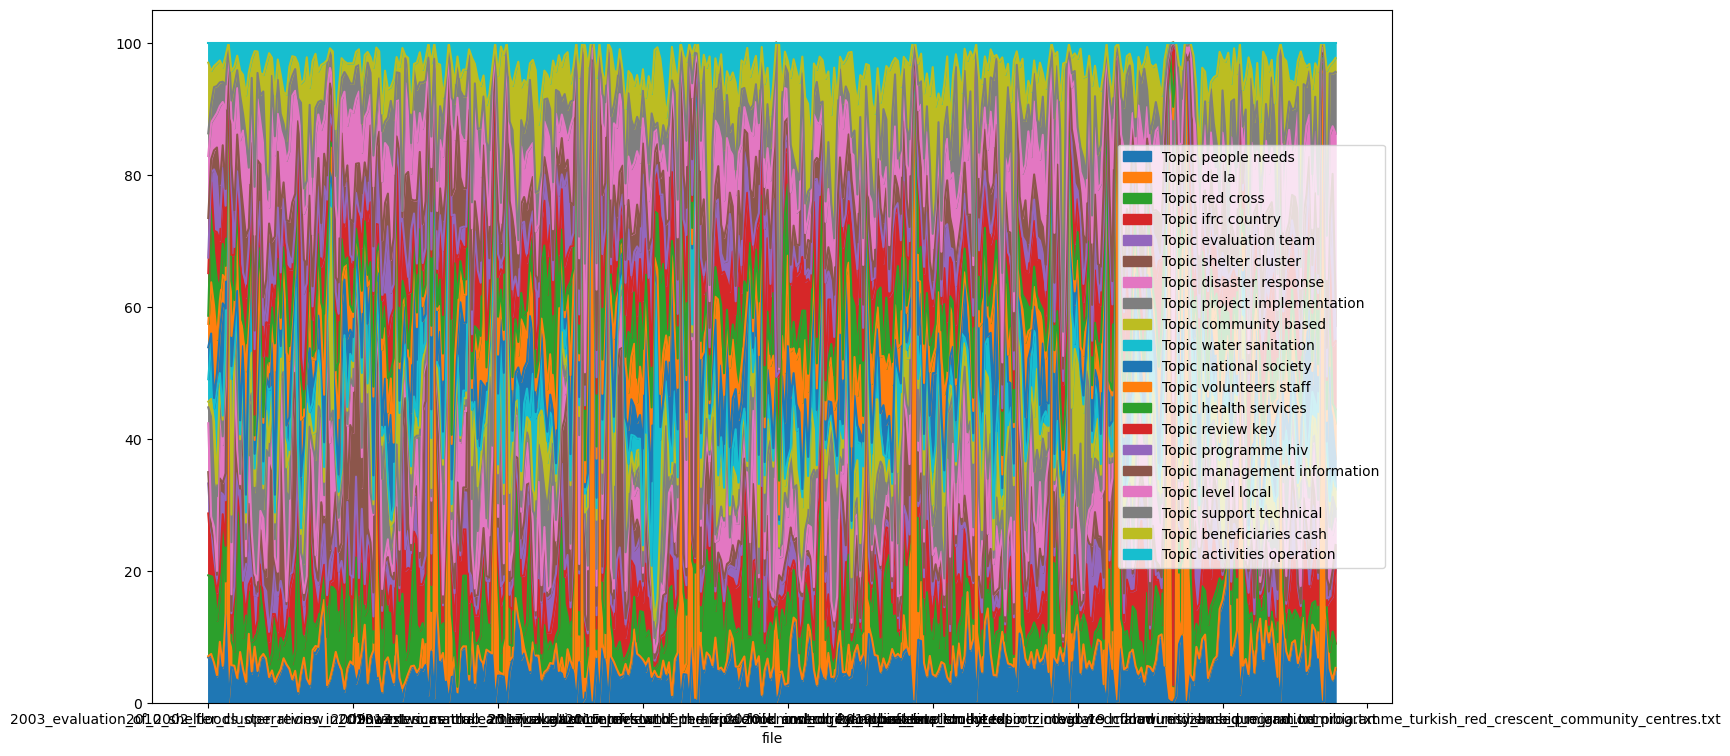

In [166]:
df_file = pd.DataFrame(file_data, columns = ["file"] + topic_names).set_index("file")
df_file.plot.area(figsize=(16,9))

In [63]:
df_main

file  \
0       2003_evaluation_of_2002_floods_operations_in_c...   
1       2003_evaluation_of_2002_floods_operations_in_c...   
2       2003_evaluation_of_2002_floods_operations_in_c...   
5       2003_evaluation_of_2002_floods_operations_in_c...   
6       2003_evaluation_of_2002_floods_operations_in_c...   
...                                                   ...   
275556       2022_review_of_the_rcrc_movement_sgbv_wg.txt   
275557       2022_review_of_the_rcrc_movement_sgbv_wg.txt   
275558       2022_review_of_the_rcrc_movement_sgbv_wg.txt   
275560       2022_review_of_the_rcrc_movement_sgbv_wg.txt   
275561       2022_review_of_the_rcrc_movement_sgbv_wg.txt   

                                            original_text  \
0         \n \n \n \n \n \nEvaluation  \n \nof  \n \n2...   
1       Red Cross  \n \n \n \n \n \n \n \n \n \n \n \n...   
2       Isabelle Sechaud  \n         Lars Peter Nissen...   
5       ToRs   Terms of Reference  \nUN  United Nation...   
6       Background ………………………………………………………………………   9  \n...   
...                                                   ...   
275556  What is the perceived \nimpact of the SGBV WG ...   
275557  a) What is the perceived impact of  SGBV WG on...   
275558  What changes, positive or negative, intended o...   
275560  What is the perceived impact of  SGBV WG on Mo...   
275561  What changes, positive or negative, intended o...   

                                        preprocessed_text  year  
0       [evaluation, floods, operations, china, red, c...  2003  
1             [red, cross, john, wilding, yunhong, zhang]  2003  
2       [isabelle, sechaud, lars, peter, nissen, april...  2003  
5       [tors, term, reference, un, united, nations, u...  2003  
6       [background, chro, nology, intervention, ratio...  2003  
...                                                   ...   ...  
275556  [perceive, impact, sgbv, wg, movement, stakeho...  2022  
275557  [perceive, impact, sgbv, wg, capacity, buildin...  2022  
275558  [change, positive, negative, intend, unintende...  2022  
275560  [perceive, impact, sgbv, wg, movement, coordin...  2022  
275561  [change, positive, negative, intend, unintende...  2022  

[212021 rows x 4 columns]